This worksheet is to see if I can improve the score by using multivarite imputation to fill in the missing data instead of using the mode. 

# Data Preprocessing

First I've imported all of fastai which includes pandas and numpy. Then I'll import some of the other functionality I'll need. Next I uploaded the train and test csv files as dataframes and then show their heads just to see what the columns contain. 

In [1]:
from fastai.imports import *

#from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Since I'll need to change all the categorical data to continuous data before imputing the missing data, I'll add the extra features here. 

In [4]:
train['Group'] = train['PassengerId'].str[0:4]
train['Deck'] = train['Cabin'].str[0]
train['Side'] = train['Cabin'].str.strip().str[-1]
splitted = train['Name'].str.split()
train['LastName'] = splitted.str[-1]
train['Spend'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
test['Group'] = test['PassengerId'].str[0:4]
test['Deck'] = test['Cabin'].str[0]
test['Side'] = test['Cabin'].str.strip().str[-1]
splitted = test['Name'].str.split()
test['LastName'] = splitted.str[-1]
test['Spend'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

Below I wanted to see the characteristics of both the continuous and the categorical data. From the competition description RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck are the amounts the passenger has billed at each of the Spaceship Titanic's many luxury amenities. Age has much smaller values than the other continuous values and I may want to look at evening these out in the future. 

In the categorical data there are a small number of categories for HomePlanet, CryoSleep, Destination and VIP. 

In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [8]:
train.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Group,Deck,Side,LastName
count,8693,8492,8476,8494,8511,8490,8493,8693,8494,8494,8493
unique,8693,3,2,6560,3,2,8473,6217,8,2,2217
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,4498,F,S,Casonston
freq,1,4602,5439,8,5915,8291,2,8,2794,4288,18


In [9]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,3822.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031,1441.711931
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742,2828.574635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,721.500000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000,1449.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,33666.000000


In [10]:
test.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Group,Deck,Side,LastName
count,4277,4190,4184,4177,4185,4184,4183,4277,4177,4177,4183
unique,4277,3,2,3265,3,2,4176,3063,8,2,1725
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle,6332,F,S,Extraly
freq,1,2263,2640,8,2956,4110,2,8,1445,2093,14


# Fill Missing Data

It's interesting that most of the columns have between 179 and 217 missing data fields. Almost all the columns have missing data and the range is very tight. However out of 8693 rows this missing data amounts to only about 2% of the total rows. But the random forest model will need to multiply a coefficient by each value. This can't be done for the missing values. So I'll need to replace the missing values with a number. The easiest way to do this is to replace them with the mode of a column. 

In [11]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Deck            199
Side            199
LastName        200
Spend           908
dtype: int64

In [12]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Group             0
Deck            100
Side            100
LastName         94
Spend           455
dtype: int64

I originally used the most common feature (the mode) to replace the missing data, but in this worksheet I'll try using MICE (Multivariate Imputation by Chained Equations) which models each variable with missing values as a function of the remaining variables and uses that estimate for imputation. 

To use MICE all the values need to be numbers. So I'll need to split out the categorical from the continuous values and then change the categorical values to numbers. 

In [13]:
cont,cat = cont_cat_split(train)

We can see that now the continuous and categorical columns are identified. 

In [14]:
cont

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Spend']

In [15]:
cat

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported',
 'Group',
 'Deck',
 'Side',
 'LastName']

In [16]:
train[cat]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,Group,Deck,Side,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False,0001,B,P,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True,0002,F,S,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False,0003,A,S,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False,0003,A,S,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True,0004,F,S,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False,9276,A,P,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False,9278,G,S,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True,9279,G,S,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False,9280,E,S,Hontichre


Then I move through each of the categorical items and transform it into numbers using pd.Categorical. 

In [17]:
for i in cat:
    train[i] = pd.Categorical(train[i])

In [18]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [19]:
train[cat] = train[cat].apply(lambda x: x.cat.codes)

In [20]:
train.describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Side,LastName,Spend
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8514.000000,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,7785.000000
mean,4346.000000,0.626711,0.324399,3077.663407,1.431497,28.827930,-0.000460,224.687617,458.077203,173.729169,311.138778,304.854791,4136.292649,0.503624,3111.468423,4.183941,0.470378,1085.309905,1484.601541
std,2509.597278,0.827623,0.518768,2008.847080,0.886083,14.489021,0.215056,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2499.751656,0.500016,1797.308796,1.928570,0.543084,655.608885,2845.288241
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2173.000000,0.000000,0.000000,1184.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1967.000000,0.000000,1552.000000,3.000000,0.000000,514.000000,0.000000
50%,4346.000000,0.000000,0.000000,3044.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4132.000000,1.000000,3115.000000,5.000000,0.000000,1089.000000,736.000000
75%,6519.000000,1.000000,1.000000,4859.000000,2.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6302.000000,1.000000,4630.000000,6.000000,1.000000,1638.000000,1486.000000
max,8692.000000,2.000000,1.000000,6559.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8472.000000,1.000000,6216.000000,7.000000,1.000000,2216.000000,35987.000000


Next I break out the categorical data as test_cat and the continuous data as test_cont. Then I convert each column in test_cat into continuous data, since the ML model can only work with numbers. 

In [21]:
test_cont,test_cat = cont_cat_split(test)
for i in test_cat:
    test[i] = pd.Categorical(test[i])

In [22]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,3822.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031,1441.711931
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742,2828.574635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,721.500000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000,1449.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,33666.000000


And now I need to also convert the categories in the test dataset to numbers. First I'm creating the test_passid dataframe to ensure the real passenger IDs are linked to these numbers, since I will need to convert these back to categorical data for my Kaggle submission.

In [23]:
test_passid = pd.DataFrame(test['PassengerId'])

In [24]:
test_passid.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


I created a PassIDCode column to house the actual numbers so that I can match them back to the categorical data when I create the submission file for the Kaggle contest. 

In [25]:
test_passid['PassIdCode'] = test.PassengerId.cat.codes

In [26]:
test_passid.head()

,PassengerId,PassIdCode
0,0013_01,0
1,0018_01,1
2,0019_01,2
3,0021_01,3
4,0023_01,4


Now I want to transform the category codes into actual values so that the categorical data becomes numbers. 

In [27]:
test[test_cat] = test[test_cat].apply(lambda x: x.cat.codes)

In [28]:
test.describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Side,LastName,Spend
count,4277.00000,4277.000000,4277.000000,4277.000000,4277.000000,4186.000000,4277.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,3822.000000
mean,2138.00000,0.646481,0.339256,1536.006547,1.451485,28.658146,-0.004442,219.266269,439.484296,177.295525,303.052443,310.710031,2040.107552,1522.465747,4.228431,0.465981,828.630816,1441.711931
std,1234.80788,0.837816,0.517409,1007.325950,0.877585,14.179072,0.197574,607.011289,1527.663045,560.821123,1117.186015,1246.994742,1230.802078,888.630463,1.882407,0.543759,509.201790,2828.574635
min,0.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1069.00000,0.000000,0.000000,588.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,970.000000,749.000000,3.000000,0.000000,384.000000,0.000000
50%,2138.00000,0.000000,0.000000,1525.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2038.000000,1515.000000,5.000000,0.000000,817.000000,721.500000
75%,3207.00000,1.000000,1.000000,2435.000000,2.000000,37.000000,0.000000,53.000000,78.000000,33.000000,50.000000,36.000000,3106.000000,2293.000000,6.000000,1.000000,1265.000000,1449.000000
max,4276.00000,2.000000,1.000000,3264.000000,2.000000,79.000000,1.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,4175.000000,3062.000000,7.000000,1.000000,1724.000000,33666.000000


I'll need to import a regressions algorithm, in this case Bayesian Ridge. I'll also need to import the iterative imputer that will do the work. 

In [29]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Here I'll create a MICE imputer using Bayes regression, specifying the number of iterative cycles as 10 and setting a random state for reproducability. 

In [30]:
imputer_train = IterativeImputer(estimator = BayesianRidge(), max_iter=10, random_state=42)

In [31]:
imputer_train.fit(train)
train_impute = imputer_train.transform(train)

Since the imputer converts the data to a numpy array, I'll need to transform the filled in data back into a dataframe. 

In [32]:
train[:]= imputer_train.transform(train)

In [33]:
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Group           0
Deck            0
Side            0
LastName        0
Spend           0
dtype: int64

In [34]:
imputer_test = IterativeImputer(estimator = BayesianRidge(), max_iter=10, random_state=42)

In [35]:
imputer_test.fit(test)
test_impute = imputer_test.transform(test)

In [36]:
test[:]= imputer_test.transform(test)

In [37]:
test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Group           0
Deck            0
Side            0
LastName        0
Spend           0
dtype: int64

In preparation for setting up the validation dataset I want to remove the target Transported column from the cat values, now that I've converted it to a number, and also identify it as the dependent variable. 

In [38]:
cat.remove('Transported')

In [39]:
cat

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Group',
 'Deck',
 'Side',
 'LastName']

In [40]:
dep='Transported'

In [41]:
train[dep].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Transported, dtype: float64

# Utilizing the Model

I'll need to split the test dataset between the training and validation sections, with 25% being the percent allocated to validation. 

In [42]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(train, test_size=0.25)

#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

Then I'm using this function to return the independent (trn_xs and val_xs) and the dependent variables (trn_y and val_y).

In [43]:
def xs_y(df):
    xs = df[cat+cont].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

The separation appeared to work. 

In [44]:
trn_xs.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Group,Deck,Side,LastName,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Spend
5623,5623.0,2.0,0.0,2395.0,2.0,0.0,3749.0,4034.0,5.0,1.0,1643.0,27.0,441.0,0.0,397.0,471.0,0.0,1309.0
5253,5253.0,1.0,1.0,331.0,0.0,0.0,261.0,3774.0,1.0,1.0,1492.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0
478,478.0,1.0,1.0,310.0,2.0,0.0,428.0,340.0,1.0,1.0,2002.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
1352,1352.0,0.0,1.0,5397.0,2.0,0.0,5238.0,952.0,6.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5344,5344.0,0.0,0.0,6427.0,2.0,0.0,4837.0,3842.0,6.0,0.0,188.0,42.0,0.0,29.0,317.0,434.0,45.0,825.0


In [45]:
trn_y.head()

5623    0.0
5253    1.0
478     1.0
1352    1.0
5344    1.0
Name: Transported, dtype: float64

These lambda functions return all the categorical data in the training and validation datasets for the independent variables into continuous values.

In [54]:
#trn_xs[cat] = trn_xs[cat].apply(lambda x: x.cat.codes)
#val_xs[cat] = val_xs[cat].apply(lambda x: x.cat.codes)

Below the dependent Transported categorical data are turned into continuous data. 

In [46]:
trn_y = pd.Categorical(trn_y).codes
val_y = pd.Categorical(val_y).codes

In [47]:
trn_y

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

Finally, I import and run a basic random forest model on the data. The number of estimators is 100 and the minimum number of samples to split a node is at 5. I tried slightly higher and lower numbers for the samples and they came out worse. 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [49]:
rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.20791168353265868

So there is an error of about 21% on this first simple attempt. 

One nice thing about random forests is that they can give you which variable has the biggest impact. This shows a number of the categories had a stronger impact. 

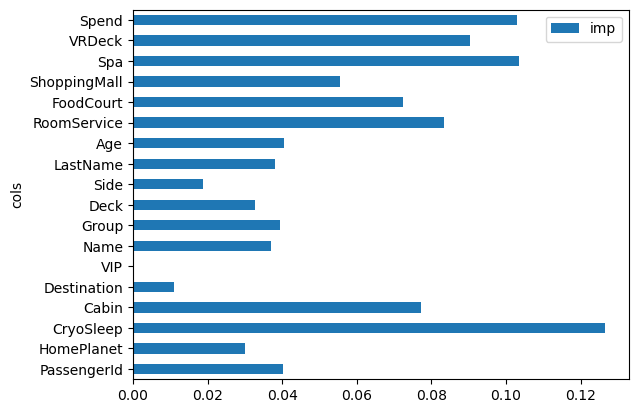

In [50]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh');

# Create Submission File

I uploaded the submission file and compared it to the test file to make sure it had the same number of rows and that the the Passengerid seemed the same. 

In [51]:
submit = pd.read_csv('sample_submission.csv')

In [52]:
submit.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [53]:
submit.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


In [55]:
test['PassengerId'].head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: PassengerId, dtype: float64

I'm creating the new Transported column in the test dataset as the dependent variable and running the random forest prediction model against the test data. 

In [59]:
test['Transported'] = rf.predict(test)

C:\Users\tompe\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [60]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Side,LastName,Spend,Transported
0,0.0,0.0,1.0,2784.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,0.0,6.0,1.0,275.0,0.0,1
1,1.0,0.0,0.0,1867.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,1.0,5.0,1.0,1190.0,2832.0,0
2,2.0,1.0,1.0,257.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,2.0,1.0,1604.0,0.0,1
3,3.0,1.0,0.0,259.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,3.0,2.0,1.0,262.0,7418.0,0
4,4.0,0.0,0.0,1940.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,4.0,5.0,1.0,736.0,645.0,0


I need to rename the PassengerId column into a PassCode column so I can next work to match the coded continuous data back to its original categorical data. 

In [61]:
test.rename(columns={'PassengerId': 'PassCode'}, inplace=True)

In [62]:
test.head()

,PassCode,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Side,LastName,Spend,Transported
0,0.0,0.0,1.0,2784.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,0.0,6.0,1.0,275.0,0.0,1
1,1.0,0.0,0.0,1867.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,1.0,5.0,1.0,1190.0,2832.0,0
2,2.0,1.0,1.0,257.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,2.0,1.0,1604.0,0.0,1
3,3.0,1.0,0.0,259.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,3.0,2.0,1.0,262.0,7418.0,0
4,4.0,0.0,0.0,1940.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,4.0,5.0,1.0,736.0,645.0,0


I need to create a PassengerID categorical data column in the test dataset to match what is in the submit dataset. So where the PassIDCode column from the test_passid dataframe I created earlier matches the PassCode column in the test dataframe, then th PassengerId column in the test dataframe will be filled with the PassengerId value from this earlier test_passid dataframe. Otherwise a NaN value will be created.  

In [63]:
test['PassengerId'] = np.where(test_passid['PassIdCode'] == test['PassCode'], test_passid['PassengerId'], 'NaN')

In [64]:
test.head()

,PassCode,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Side,LastName,Spend,Transported,PassengerId
0,0.0,0.0,1.0,2784.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,0.0,6.0,1.0,275.0,0.0,1,0013_01
1,1.0,0.0,0.0,1867.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,1.0,5.0,1.0,1190.0,2832.0,0,0018_01
2,2.0,1.0,1.0,257.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,2.0,1.0,1604.0,0.0,1,0019_01
3,3.0,1.0,0.0,259.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,3.0,2.0,1.0,262.0,7418.0,0,0021_01
4,4.0,0.0,0.0,1940.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,4.0,5.0,1.0,736.0,645.0,0,0023_01


Below I'm making sure there are no NaN values for the new PassengerId column. 

In [65]:
test['PassengerId'].isna().sum()

0

I'm just moving the PassengerId to the front of the datafram here. 

In [66]:
#TEST
col = test.pop('PassengerId')
test.insert(0, col.name, col)

In [67]:
test.head()

,PassengerId,PassCode,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Side,LastName,Spend,Transported
0,0013_01,0.0,0.0,1.0,2784.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,0.0,6.0,1.0,275.0,0.0,1
1,0018_01,1.0,0.0,0.0,1867.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,1.0,5.0,1.0,1190.0,2832.0,0
2,0019_01,2.0,1.0,1.0,257.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,2.0,1.0,1604.0,0.0,1
3,0021_01,3.0,1.0,0.0,259.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,3.0,2.0,1.0,262.0,7418.0,0
4,0023_01,4.0,0.0,0.0,1940.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,4.0,5.0,1.0,736.0,645.0,0


Here I'm converting the Transported column back into the True/False boolean values that will be needed for submission. 

In [68]:
test['Transported'] = np.where(test['Transported'] == 1, 'True', 'False')

In [69]:
test.head()

,PassengerId,PassCode,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Side,LastName,Spend,Transported
0,0013_01,0.0,0.0,1.0,2784.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2912.0,0.0,6.0,1.0,275.0,0.0,True
1,0018_01,1.0,0.0,0.0,1867.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,2406.0,1.0,5.0,1.0,1190.0,2832.0,False
2,0019_01,2.0,1.0,1.0,257.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,3376.0,2.0,2.0,1.0,1604.0,0.0,True
3,0021_01,3.0,1.0,0.0,259.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2711.0,3.0,2.0,1.0,262.0,7418.0,False
4,0023_01,4.0,0.0,0.0,1940.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,668.0,4.0,5.0,1.0,736.0,645.0,False


This creates the actual submission file with this initial benchmark random forest model. 

In [70]:
submit_benchmark = test[['PassengerId', 'Transported']]

In [71]:
submit_benchmark.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [72]:
submit_benchmark.to_csv('submit_rf_DICEimpute.csv', index=False)

For this submission I received a score of 0.69254 which much worse than my other submissions. 